# Framingham heart disease study (See below link for the details)

In [3]:

#https://en.wikipedia.org/wiki/Framingham_Heart_Study
#https://en.wikipedia.org/wiki/Coronary_artery_disease
#http://cvdrisk.nhlbi.nih.gov/

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.grid_search import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import Imputer

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Layer, Reshape, AutoEncoder, Merge
from keras.layers.convolutional import Convolution2D,MaxPooling2D,Convolution1D,MaxPooling1D,UpSampling2D, ZeroPadding2D
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import keras.utils.visualize_util as vutil
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.regularizers import l1, l2, l1l2, activity_l2, activity_l1
import keras.layers.containers as containers
from keras.layers.noise import GaussianNoise
from keras.regularizers import ActivityRegularizer
from keras import backend as K
import keras.utils.visualize_util as vutil
from keras.models import model_from_json

from IPython.display import SVG

np.set_printoptions(suppress=True)  #Supress exponent of the number 2e-2 == 0.02

%matplotlib inline


import matplotlib.pyplot as plt
import scipy.optimize as opt
import glob
import os
import sys
%matplotlib inline

In [5]:
#(1069+11)/(1069.+6+187+11)

In [6]:
framinghhamDataFrame = pd.read_csv('framingham.csv')

In [7]:
#visualization data
print type(framinghhamDataFrame)
print framinghhamDataFrame.shape
print framinghhamDataFrame.head()

<class 'pandas.core.frame.DataFrame'>
(4240, 16)
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39          4              0           0       0                0   
1     0   46          2              0           0       0                0   
2     1   48          1              1          20       0                0   
3     0   61          3              1          30       0                0   
4     0   46          3              1          23       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0      195  106.0     70  26.97         80       77   
1             0         0      250  121.0     81  28.73         95       76   
2             0         0      245  127.5     80  25.34         75       70   
3             1         0      225  150.0     95  28.58         65      103   
4             0         0      285  130.0     84  23.10         85       85   

 

In [8]:
#check to see if there are any NA value, if so 
#For now I am just dropping NA value, but its better to do impute with mean or meadian value latter.

print np.unique(framinghhamDataFrame.isnull())
print framinghhamDataFrame.isnull().values.any()

#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp.fit(framinghhamDataFrame[predictors])
#X = imp.transform(framinghhamDataFrame[predictors])

#print framinghhamDataFrame.shape
framinghhamDataFrame = framinghhamDataFrame.dropna(axis=0)
print framinghhamDataFrame.shape

print np.unique(framinghhamDataFrame.isnull())
print framinghhamDataFrame.isnull().values.any()

['BMI' 'BPMeds' 'TenYearCHD' 'age' 'cigsPerDay' 'currentSmoker' 'diaBP'
 'diabetes' 'education' 'glucose' 'heartRate' 'male' 'prevalentHyp'
 'prevalentStroke' 'sysBP' 'totChol']
True
(3658, 16)
['BMI' 'BPMeds' 'TenYearCHD' 'age' 'cigsPerDay' 'currentSmoker' 'diaBP'
 'diabetes' 'education' 'glucose' 'heartRate' 'male' 'prevalentHyp'
 'prevalentStroke' 'sysBP' 'totChol']
False


In [9]:
#We are trying to predict TenYearCHD 
#Splitting the data for classification purpose..
#Input dataframe consists of X1, X2
print framinghhamDataFrame.shape

#Reshuffle the data randomly
framinghhamDataFrame = framinghhamDataFrame.reindex(np.random.permutation(framinghhamDataFrame.index))

X = framinghhamDataFrame.drop(['TenYearCHD'],axis=1) 

print X.shape

#Output vector(predictor/response) vector
Y = framinghhamDataFrame['TenYearCHD']

print Y.shape
#Splitting data into train and testing. 70% Training and 30% Testing..
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)


(3658, 16)
(3658, 15)
(3658,)


In [10]:
#Lets visualize the data
print 'X_train=',X_train.shape,' Y_train=',Y_train.shape,' \nX_test=',X_test.shape,' Y_test=',Y_test.shape
print np.unique(Y_train), np.unique(Y_test)

X_train= (2560, 15)  Y_train= (2560,)  
X_test= (1098, 15)  Y_test= (1098,)
[0 1] [0 1]


# Logistic Regression

In [11]:
#Logistic Regression-sklearn
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)
Y_logPred = logReg.predict(X_test)
print metrics.accuracy_score(Y_test,Y_logPred)

#print Y_logPred

0.845173041894


In [12]:
Y_preds_prob_log = logReg.predict_proba(X_test)
print(Y_preds_prob_log)

print(Y_logPred)
print np.sum(Y_logPred==1)

[[ 0.94133132  0.05866868]
 [ 0.89919701  0.10080299]
 [ 0.75498606  0.24501394]
 ..., 
 [ 0.8763054   0.1236946 ]
 [ 0.8414043   0.1585957 ]
 [ 0.92302189  0.07697811]]
[0 0 0 ..., 0 0 0]
9


In [13]:
#print confusion matrix
#Confusion matrix of logistic regression
confusion = metrics.confusion_matrix(Y_test,Y_logPred)
print confusion

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[923   4]
 [166   5]]


In [14]:
print TP, TN, FP, FN

5 923 4 166


In [15]:
#Accuracy
print (TP + TN) / float(TP + TN + FP + FN)
print metrics.accuracy_score(Y_test, Y_logPred)

0.845173041894
0.845173041894


In [16]:
#Classification Error
print (FP + FN) / float(TP + TN + FP + FN)
print 1 - metrics.accuracy_score(Y_test, Y_logPred)

0.154826958106
0.154826958106


In [17]:
#Sensitivity
print TP / float(TP + FN)
print metrics.recall_score(Y_test, Y_logPred)

0.0292397660819
0.0292397660819


In [18]:
#Specifity
print TN / float(TN + FP)

0.995685005394


In [17]:
#False positive rate
print FP / float(TN + FP)

0.00326441784548


In [18]:
target_names = ['class 0', 'class 1']

print(classification_report(Y_test, Y_logPred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.84      1.00      0.91       919
    class 1       0.62      0.03      0.05       179

avg / total       0.81      0.84      0.77      1098



In [19]:
#Precision
P = TP / float(TP + FP)
print P
print metrics.precision_score(Y_test, Y_logPred)

0.625
0.625


In [20]:
#Recall
R = TP / float(TP + FN)
print R
print metrics.recall_score(Y_test, Y_logPred)


0.0279329608939
0.0279329608939


In [21]:
#F1 Score
print (2*P*R)/float(P+R)
print metrics.f1_score(Y_test, Y_logPred)

0.0534759358289
0.0534759358289


In [22]:
# store the predicted probabilities for class 1
Y_logPred_prob = logReg.predict_proba(X_test)[:, 1]

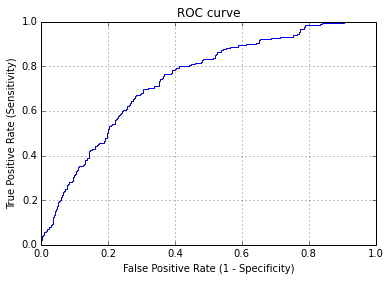

In [23]:
#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_logPred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [24]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print metrics.roc_auc_score(Y_test, Y_logPred)

0.512334271524


In [25]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logReg, X_test, Y_test, cv=10, scoring='roc_auc').mean()

0.73879188799265527

# Random Forest

In [26]:
#Random Forest Classification
randForest = RandomForestClassifier(n_estimators=30)
randForest.fit(X_train,Y_train)
Y_randForestPred = randForest.predict(X_test)
print metrics.accuracy_score(Y_test,Y_randForestPred)

0.834244080146


In [27]:
#print confusion matrix
#Confusion matrix of logistic regression
confusion = metrics.confusion_matrix(Y_test,Y_randForestPred)
print confusion

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[911   8]
 [174   5]]


In [28]:
#Precision
P = TP / float(TP + FP)
print P
print metrics.precision_score(Y_test, Y_randForestPred)

0.384615384615
0.384615384615


In [29]:
#Recall
R = TP / float(TP + FN)
print R
print metrics.recall_score(Y_test, Y_randForestPred)

0.0279329608939
0.0279329608939


In [30]:
#F1 Score
print (2*P*R)/float(P+R)
print metrics.f1_score(Y_test, Y_randForestPred)

0.0520833333333
0.0520833333333


In [31]:
# store the predicted probabilities for class 1
Y_randForestPred = randForest.predict_proba(X_test)[:, 1]

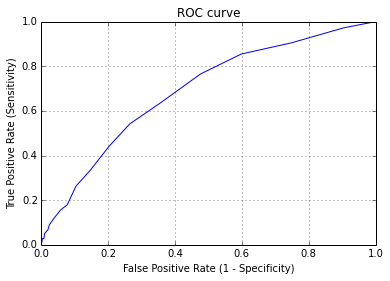

In [32]:
#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_randForestPred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Support Vector Machine (SVM)

In [33]:
#Support Vector Machine
#svc = svm.SVC(kernel='linear',C=10, max_iter=1000)
svc = svm.LinearSVC(C=8, loss='hinge', max_iter=1000)
svc

LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [34]:
Y_svmPred = svc.fit(X_train,Y_train).predict(X_test)
svc.score(X_test, Y_test)

0.16302367941712204

In [35]:
#print confusion matrix
#Confusion matrix of logistic regression
confusion = metrics.confusion_matrix(Y_test,Y_svmPred)
print confusion

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[  0 919]
 [  0 179]]


In [36]:
#Precision
P = TP / float(TP + FP)
print P
print metrics.precision_score(Y_test, Y_svmPred)

0.163023679417
0.163023679417


In [37]:
#Recall
R = TP / float(TP + FN)
print R
print metrics.recall_score(Y_test, Y_svmPred)

1.0
1.0


In [38]:
#F1 Score
print (2*P*R)/float(P+R)
print metrics.f1_score(Y_test, Y_svmPred)

0.280344557557
0.280344557557


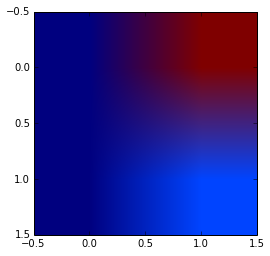

In [39]:
#Heat map for confusion matrix
plt.imshow(confusion)

In [40]:
# store the predicted probabilities for class 1
#Y_svcPred_prob = svc.predict_proba(X_test)[:, 1]

In [41]:
print X_train.shape, Y_train.shape
print X_test.shape, Y_test.shape

(2560, 15) (2560,)
(1098, 15) (1098,)


In [42]:
np.unique(Y_test)

array([0, 1])

In [43]:
X_train = X_train.values
X_test  = X_test.values

In [64]:
batch_size = 100
nb_classes = 2
nb_epoch = 100

# the data, shuffled and split between train and test sets
#(X_train, y_train), (X_test, y_test) = X_train, X_test, Y_train, Y_test

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(Y_train, nb_classes)
y_test  = np_utils.to_categorical(Y_test, nb_classes)

model = Sequential()
model.add(Dense(10, input_dim=15))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(8))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

rms = RMSprop()
model.compile(loss='binary_crossentropy', optimizer=rms)

hist  = model.fit(X_train, y_train,
          batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=2, validation_data=(X_test, y_test) )
score = model.evaluate(X_test, y_test,
                       show_accuracy=True, verbose=0)

print('Test accuracy:', score[1])
print('Test score:', score[0])

(2560, 'train samples')
(1098, 'test samples')
Train on 2560 samples, validate on 1098 samples
Epoch 1/100
0s - loss: 0.6682 - acc: 0.8477 - val_loss: 0.6299 - val_acc: 0.8370
Epoch 2/100
0s - loss: 0.6162 - acc: 0.7398 - val_loss: 0.5702 - val_acc: 0.8352
Epoch 3/100
0s - loss: 0.6322 - acc: 0.6496 - val_loss: 0.5905 - val_acc: 0.8352
Epoch 4/100
0s - loss: 0.6081 - acc: 0.7297 - val_loss: 0.5756 - val_acc: 0.8352
Epoch 5/100
0s - loss: 0.5728 - acc: 0.8238 - val_loss: 0.5590 - val_acc: 0.8370
Epoch 6/100
0s - loss: 0.5561 - acc: 0.8512 - val_loss: 0.5392 - val_acc: 0.8370
Epoch 7/100
0s - loss: 0.5295 - acc: 0.8520 - val_loss: 0.5172 - val_acc: 0.8370
Epoch 8/100
0s - loss: 0.5111 - acc: 0.8523 - val_loss: 0.5033 - val_acc: 0.8370
Epoch 9/100
0s - loss: 0.4953 - acc: 0.8523 - val_loss: 0.4867 - val_acc: 0.8370
Epoch 10/100
0s - loss: 0.4792 - acc: 0.8520 - val_loss: 0.4734 - val_acc: 0.8370
Epoch 11/100
0s - loss: 0.4693 - acc: 0.8527 - val_loss: 0.4635 - val_acc: 0.8370
Epoch 12/100

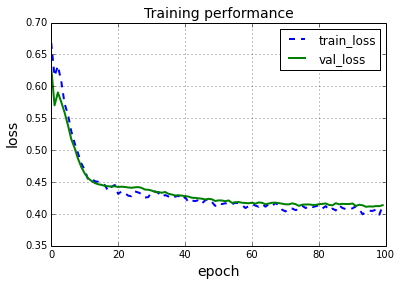

In [65]:
plt.figure()
plt.title('Training performance',fontsize=14)
plt.plot(hist.epoch, hist.history['loss'],'--', label='train_loss', lw=2)
plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss', lw=2)
plt.legend()
plt.xlabel('epoch', fontsize=14)
plt.ylabel('loss', fontsize=14)

plt.grid(True)
#plt.savefig('smartgrid_nn_loss.png')

In [66]:
Y_preds_prob = model.predict_proba(X_test, verbose=0)
print(Y_preds_prob)

[[ 0.90724713  0.09230261]
 [ 0.92655373  0.07158815]
 [ 0.88937449  0.1115536 ]
 ..., 
 [ 0.88784254  0.11314539]
 [ 0.87954068  0.12168007]
 [ 0.89186299  0.10896312]]


In [67]:
Y_preds_nn = model.predict_classes(X_test, verbose=0)
print(Y_preds_nn[:10])

[0 0 0 0 0 0 0 0 0 0]


In [68]:
#Confusion matrix of logistic regression
conf = metrics.confusion_matrix(Y_test,Y_preds_nn)
#plt.imshow(conf)
print conf

[[919   0]
 [179   0]]


In [49]:
target_names = ['class 0', 'class 1']

print(classification_report(Y_test, Y_preds_nn, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.84      1.00      0.91       919
    class 1       0.00      0.00      0.00       179

avg / total       0.70      0.84      0.76      1098



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


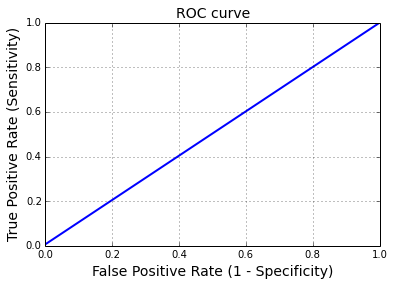

In [50]:
#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_preds_prob[:,1])
plt.plot(fpr, tpr, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve',fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=14) #fontweight='bold'
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=14)
plt.grid(True)

#plt.savefig('smartgrid_nn_roc.png')

In [51]:
print metrics.roc_auc_score(Y_test, Y_preds_prob[:,1])

0.502793296089


In [52]:
X_train_1 = X_train.reshape(2560,15,1)
X_test_1 = X_test.reshape(1098,15,1)

print X_train_1.shape, X_test_1.shape 

(2560, 15, 1) (1098, 15, 1)


In [53]:
# 1D conv

# set parameters:
batch_size = 20
input_length = X_train_1.shape[1]
nb_epoch = 50
nb_classes = 1

print('Build model...')

model = Sequential()

model.add(Convolution1D(nb_filter=64,
                        filter_length=3,
                        border_mode='valid',
                        activation='relu',
                        input_dim=1, 
                        input_length=input_length)) 
                       
model.add(Convolution1D(nb_filter=32,
                        filter_length=3,
                        border_mode='valid',
                        activation='relu'))
                        
model.add(MaxPooling1D(pool_length=2))

model.add(Convolution1D(nb_filter=16,
                        filter_length=3,
                        border_mode='valid',
                        activation='relu'))

model.add(Convolution1D(nb_filter=16,
                        filter_length=3,
                        border_mode='same',
                        activation='relu'))

model.add(MaxPooling1D(pool_length=2))

# Adding GRU layer 
#model.add(GRU(output_dim=14))
#model.add(Activation('relu'))

#print_layers_shapes(model)

model.add(Flatten())

model.add(Dense(10))
model.add(Dropout(0.25))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(nb_classes)) 
model.add(Activation('sigmoid'))

#print_layers_shapes(model)

rms = RMSprop()
model.compile(loss='binary_crossentropy', optimizer=rms)



print('Train...')
history = model.fit(X_train_1, Y_train, batch_size=batch_size,
          nb_epoch=nb_epoch, show_accuracy=True,
          validation_data=(X_test_1, Y_test),verbose=2)

score, acc = model.evaluate(X_test_1, Y_test, batch_size=batch_size,
                            show_accuracy=True)

print('Test accuracy:', acc)
print('Test score:', score)


Build model...
Train...
Train on 2560 samples, validate on 1098 samples
Epoch 1/50
0s - loss: 0.4635 - acc: 1.0000 - val_loss: 0.4553 - val_acc: 1.0000
Epoch 2/50
0s - loss: 0.4464 - acc: 1.0000 - val_loss: 0.4539 - val_acc: 1.0000
Epoch 3/50
0s - loss: 0.4451 - acc: 1.0000 - val_loss: 0.5015 - val_acc: 1.0000
Epoch 4/50
0s - loss: 0.4478 - acc: 1.0000 - val_loss: 0.4474 - val_acc: 1.0000
Epoch 5/50
0s - loss: 0.4380 - acc: 1.0000 - val_loss: 0.4438 - val_acc: 1.0000
Epoch 6/50
0s - loss: 0.4425 - acc: 1.0000 - val_loss: 0.4399 - val_acc: 1.0000
Epoch 7/50
0s - loss: 0.4286 - acc: 1.0000 - val_loss: 0.4315 - val_acc: 1.0000
Epoch 8/50
0s - loss: 0.4194 - acc: 1.0000 - val_loss: 0.4280 - val_acc: 1.0000
Epoch 9/50
0s - loss: 0.4138 - acc: 1.0000 - val_loss: 0.4189 - val_acc: 1.0000
Epoch 10/50
0s - loss: 0.4042 - acc: 1.0000 - val_loss: 0.4120 - val_acc: 1.0000
Epoch 11/50
0s - loss: 0.4060 - acc: 1.0000 - val_loss: 0.4181 - val_acc: 1.0000
Epoch 12/50
0s - loss: 0.3997 - acc: 1.0000 - 

In [54]:
vutil.plot(model, to_file='framingham_cnn1d.png')
#vutil.plot(autoencoder, recursive=True, show_shape=True).create(prog='dot', format="png")
#SVG(vutil.to_graph(model, recursive=True, show_shape=True).create(prog='dot', format="svg"))

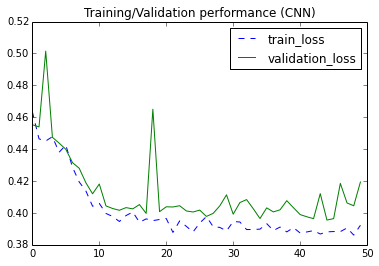

In [55]:
plt.figure()
plt.title('Training/Validation performance (CNN)')
plt.plot(history.epoch, history.history['loss'],'--', label='train_loss')
plt.plot(history.epoch, history.history['val_loss'], label='validation_loss')
plt.legend()

In [56]:
Y_preds_prob_cnn = model.predict_proba(X_test_1, verbose=0)
print(Y_preds_prob_cnn[:5])

[[ 0.02488291]
 [ 0.02100166]
 [ 0.07104886]
 [ 0.1529303 ]
 [ 0.07321633]]


In [57]:
Y_preds_cnn = model.predict_classes(X_test_1, verbose=0)
print(Y_preds_cnn)

[0 0 0 ..., 0 0 0]


In [58]:
#Confusion matrix of logistic regression
conf = metrics.confusion_matrix(Y_test,Y_preds_cnn)
#plt.imshow(conf)
print conf

[[919   0]
 [179   0]]


In [59]:
target_names = ['class 0', 'class 1']

print(classification_report(Y_test, Y_preds_cnn, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.84      1.00      0.91       919
    class 1       0.00      0.00      0.00       179

avg / total       0.70      0.84      0.76      1098



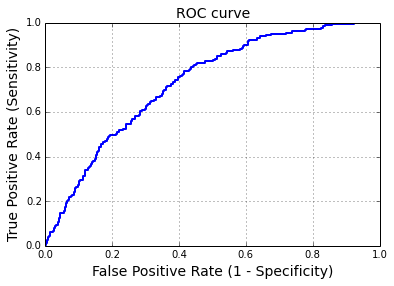

In [60]:
#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, Y_preds_prob_cnn)
plt.plot(fpr1, tpr1, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve',fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=14) #fontweight='bold'
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=14)
plt.grid(True)

#plt.savefig('smartgrid_cnn1d_roc.png')

#Y_logPred_prob = logReg.predict_proba(X_test)[:, 1]

In [61]:
print metrics.roc_auc_score(Y_test, Y_preds_prob_cnn)

0.732062419073


In [63]:
np.sum(Y_test==1)

179

In [60]:
data6a = pd.read_table('6a.dat', sep='\t', header=None, skiprows=1)
#pd.read_csv('6a.dat')

In [61]:
data6a.shape

(1040718, 1)

In [62]:
data6a[0:1]

,0
0,00198987912231104909 2230000001025470004547005...
